# SONAR

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox,zscore
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,StandardScaler as ss
from sklearn.decomposition import PCA

In [2]:
rm=pd.read_csv('sonar.csv',names=range(0,61),header=0)
rm

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [3]:
rm.head(10)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
5,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
6,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,R
7,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,R
8,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,R
9,0.0039,0.0063,0.0152,0.0336,0.0310,0.0284,0.0396,0.0272,0.0323,0.0452,...,0.0062,0.0120,0.0052,0.0056,0.0093,0.0042,0.0003,0.0053,0.0036,R


In [4]:
rm.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
56    float64
57    float64
58    float64
59    float64
60     object
Length: 61, dtype: object

In [5]:
rm.max()

0     0.1371
1     0.2339
2     0.3059
3     0.4264
4      0.401
       ...  
56    0.0355
57     0.044
58    0.0364
59    0.0439
60         R
Length: 61, dtype: object

In [6]:
rm.min()

0     0.0015
1     0.0006
2     0.0015
3     0.0058
4     0.0067
       ...  
56    0.0003
57    0.0003
58    0.0001
59    0.0006
60         M
Length: 61, dtype: object

In [7]:
rm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
0     207 non-null float64
1     207 non-null float64
2     207 non-null float64
3     207 non-null float64
4     207 non-null float64
5     207 non-null float64
6     207 non-null float64
7     207 non-null float64
8     207 non-null float64
9     207 non-null float64
10    207 non-null float64
11    207 non-null float64
12    207 non-null float64
13    207 non-null float64
14    207 non-null float64
15    207 non-null float64
16    207 non-null float64
17    207 non-null float64
18    207 non-null float64
19    207 non-null float64
20    207 non-null float64
21    207 non-null float64
22    207 non-null float64
23    207 non-null float64
24    207 non-null float64
25    207 non-null float64
26    207 non-null float64
27    207 non-null float64
28    207 non-null float64
29    207 non-null float64
30    207 non-null float64
31    207 non-null float64
32    207 non-null float64
33  

In [8]:
rm.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,...,0.016034,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,...,0.012027,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,...,0.008350,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,...,0.013800,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,...,0.020700,0.016750,0.014900,0.014450,0.012100,0.010350,0.010350,0.010400,0.010350,0.008550
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [9]:
obj=['object']
rm.describe(include=obj)

,60
count,207
unique,2
top,M
freq,111


In [10]:
rm.shape

(207, 61)

In [11]:
rmd=rm.duplicated()
rmd.value_counts()
#no duplicate row
#rm.duplicated().sum()

False    207
dtype: int64

In [12]:
rm.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

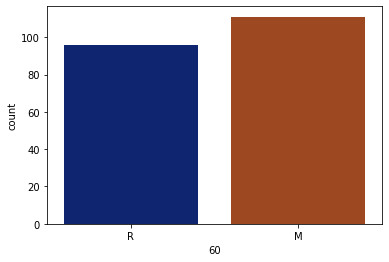

In [13]:
sns.countplot(rm[60],palette='dark')

In [14]:
rm.groupby(rm[60]).mean()
#mean values of columns contributing to M and R

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022524,0.030232,0.035879,0.041664,0.061680,0.096199,0.113767,0.117153,0.135584,0.158785,...,0.012198,0.010533,0.009673,0.009451,0.008581,0.007333,0.007708,0.006659,0.007058,0.006053


In [15]:
rm.groupby(rm[60]).size()
#cases of R and M

60
M    111
R     96
dtype: int64

In [16]:
lbl=LabelEncoder()


In [17]:
rm[60]=lbl.fit_transform(rm[60])

In [18]:
rm

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,0
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,0
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,0
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,0


In [19]:
x=rm.iloc[:,0:60]

In [20]:
x

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


In [21]:
y=rm.iloc[:,-1]

In [22]:
y

0      1
1      1
2      1
3      1
4      1
      ..
202    0
203    0
204    0
205    0
206    0
Name: 60, Length: 207, dtype: int32

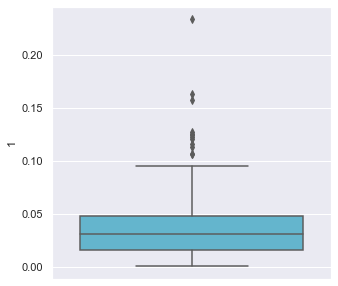

In [23]:
sns.set(style='darkgrid')
plt.figure(figsize=(5,5))
sns.boxplot(rm[1],color='c',saturation=6,orient='v')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1b51f96d288>,
 'caps': [<matplotlib.lines.Line2D at 0x1b51f96dd88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b51f966b08>],
 'medians': [<matplotlib.lines.Line2D at 0x1b51f96dec8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b51f972dc8>],
 'means': []}

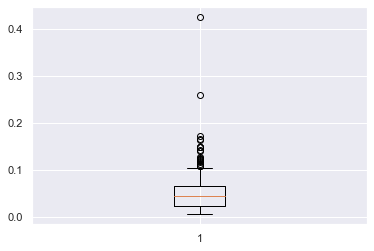

In [24]:
plt.boxplot(rm[3],whis=True)

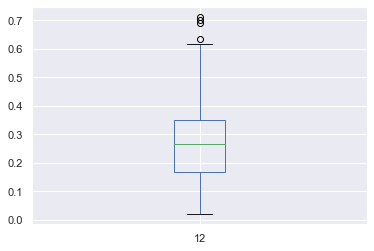

In [25]:
rm[12].plot.box()

In [26]:
cl=rm.columns.values
len(cl)

61

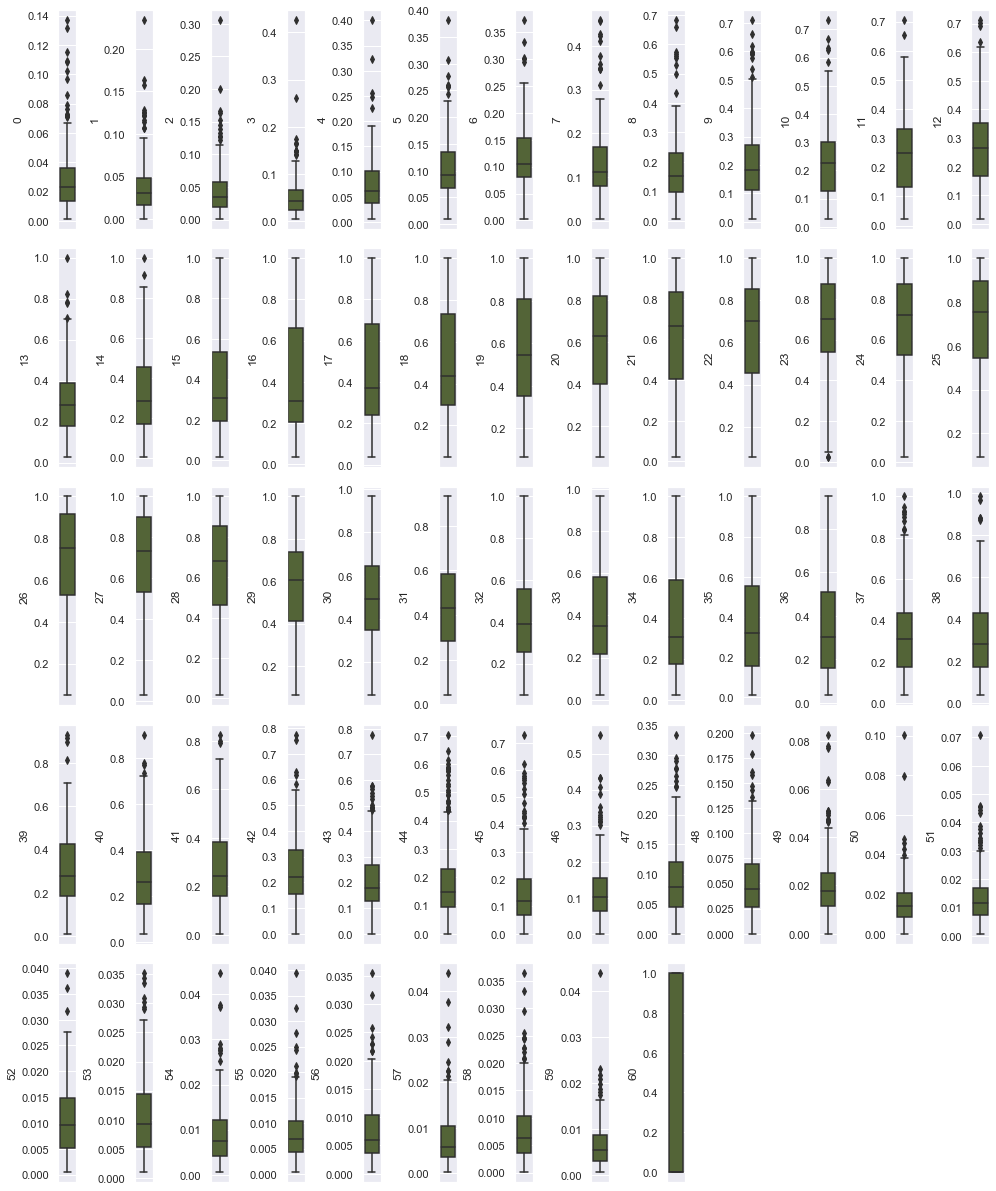

In [27]:
sns.set(style='darkgrid')
plt.figure(figsize=(14,20))
for i in range (0, 61):
    plt.subplot(6,13,i+1)
    sns.boxplot(rm[cl[i]], color='darkolivegreen' ,orient='v')
plt.tight_layout()

In [28]:
#zscore:

In [29]:
z=np.abs(zscore(rm))
z

array([[0.70018948, 0.42042142, 1.0529498 , ..., 0.44268846, 0.42246083,
        1.07529066],
       [0.13089402, 0.59942737, 1.71912994, ..., 0.25299833, 0.25405324,
        1.07529066],
       [0.83579208, 0.64754631, 0.48045125, ..., 0.63683361, 1.03005467,
        1.07529066],
       ...,
       [1.00042384, 0.15949749, 0.67235266, ..., 0.0382194 , 0.68112798,
        0.92998111],
       [0.0475061 , 0.09535845, 0.13434985, ..., 0.70154866, 0.34287094,
        0.92998111],
       [0.13959647, 0.06501846, 0.78685237, ..., 0.2970796 , 0.99025973,
        0.92998111]])

In [30]:
print(np.where(z>3))

(array([  1,   1,   1,   1,   2,   2,   4,   4,  18,  18,  19,  20,  21,
        21,  21,  21,  21,  21,  21,  21,  32,  43,  43,  43,  64,  84,
        84,  86,  90,  90,  96,  96,  97,  97,  97,  97,  97,  97, 100,
       100, 104, 110, 110, 110, 111, 126, 126, 126, 128, 128, 128, 130,
       131, 131, 132, 132, 132, 133, 133, 133, 133, 134, 134, 134, 134,
       135, 135, 135, 135, 136, 136, 137, 137, 137, 139, 139, 139, 139,
       139, 140, 140, 141, 141, 141, 142, 142, 142, 143, 144, 144, 145,
       145, 145, 145, 145, 145, 145, 145, 145, 146, 146, 146, 146, 146,
       146, 146, 146, 160, 183, 185, 185, 185], dtype=int64), array([ 8,  9, 11, 56, 38, 39, 13, 14,  4,  7,  5, 37, 38, 39, 40, 41, 46,
       47, 48, 49, 49, 39, 42, 43, 58,  1,  2, 56,  5,  6, 58, 59,  0,  1,
        2,  3,  4, 59, 12, 57, 55,  2,  3,  4, 57, 13, 54, 57,  0, 12, 53,
        0,  7,  8,  8,  9, 52,  0,  6,  7,  8,  7,  8, 53, 55,  0,  7,  8,
       51,  9, 10,  2, 47, 51, 45, 46, 48, 49, 50, 45, 59, 53

In [31]:
z[185][45]

3.208132136776908

In [32]:
z[146][54]

4.995604165843624

In [33]:
rnm=rm[(z<3).all(axis=1)]

In [34]:
rnm

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1
5,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,1
6,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,1
7,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,0
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,0
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,0
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,0


In [35]:
print('the shape of rm:-', rm.shape, '\t\t the shape of rnm:- ', rnm.shape)

the shape of rm:- (207, 61) 		 the shape of rnm:-  (167, 61)


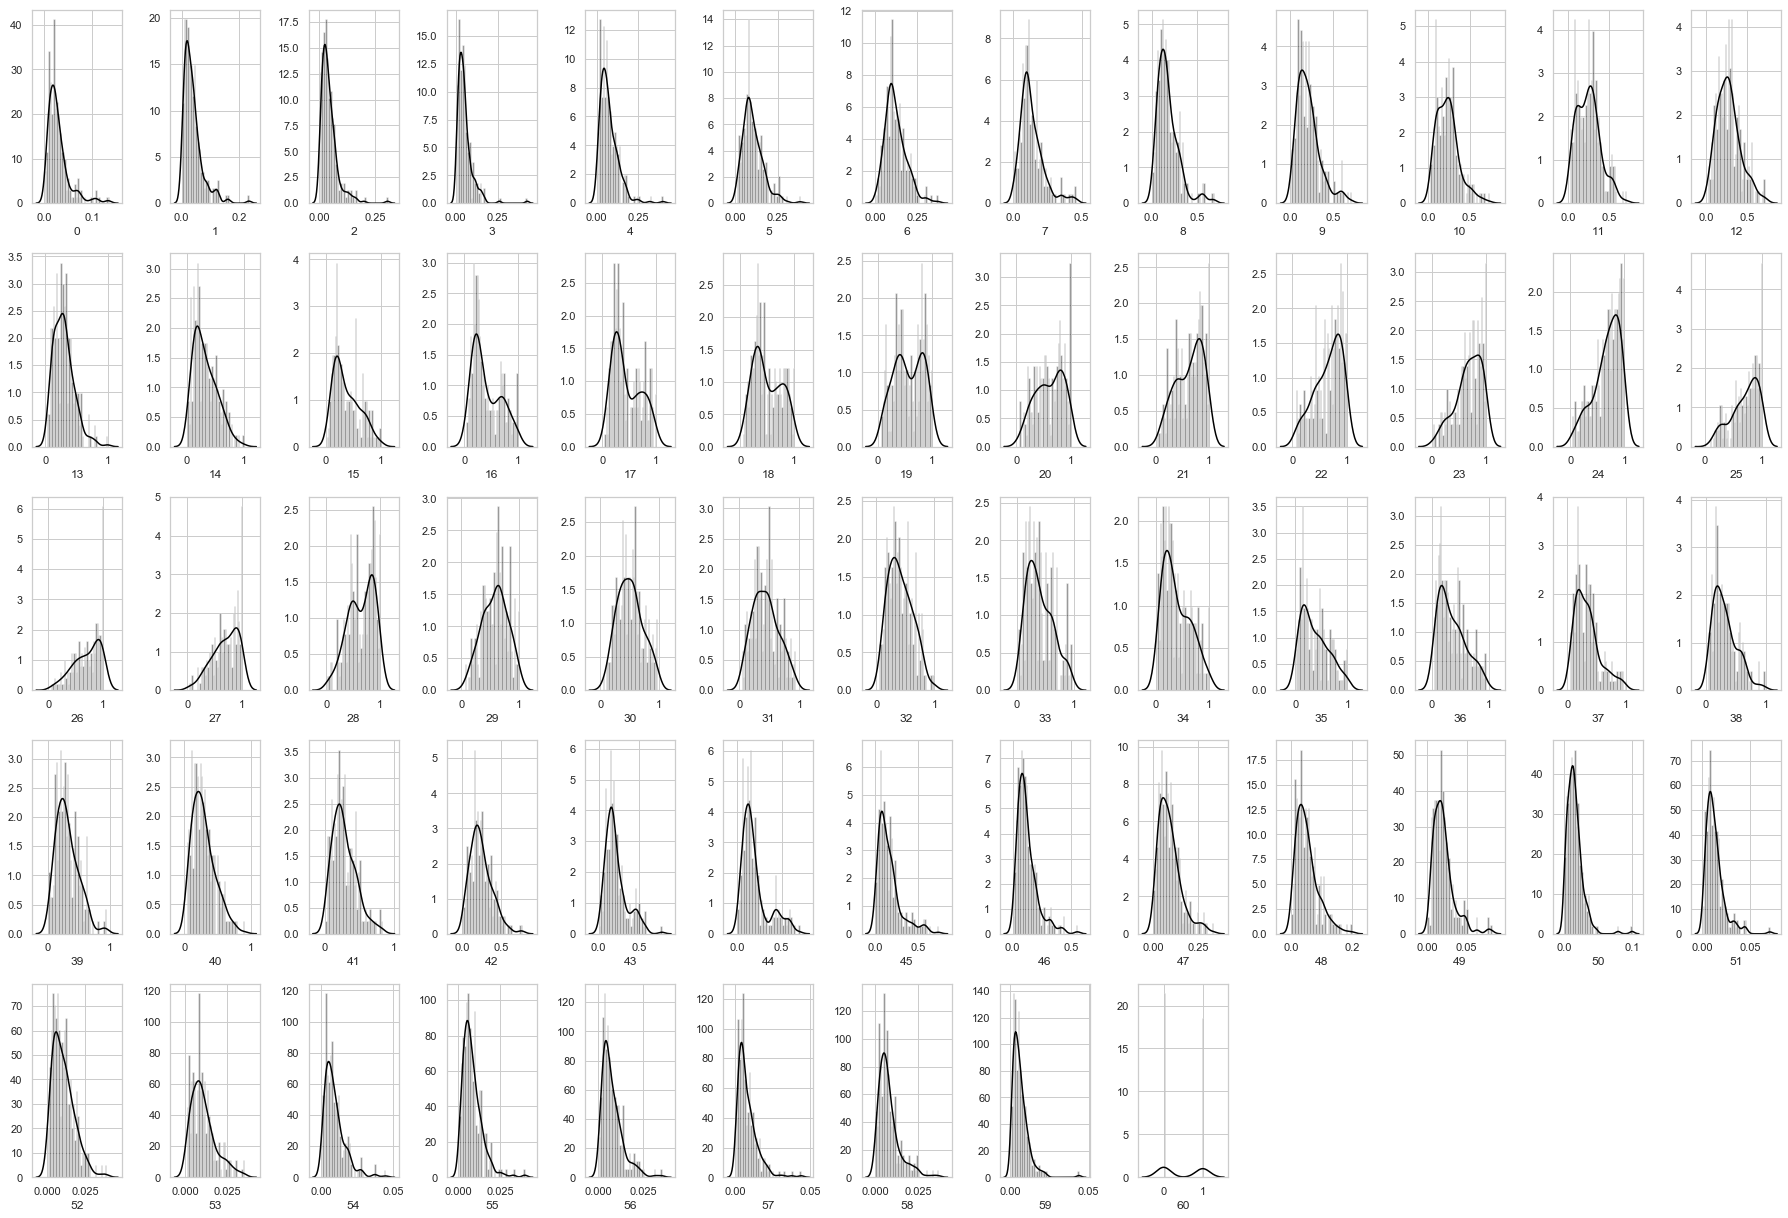

In [36]:
sns.set(style='whitegrid')
plt.figure(figsize=(25,20))
for i in range (0, 61):
    plt.subplot(6,13,i+1)
    sns.distplot(rm[cl[i]], color='black',bins=40)
plt.tight_layout()

In [37]:
rnm.skew()

0     1.252721
1     1.308041
2     1.653128
3     1.229816
4     0.933829
        ...   
56    1.404770
57    1.371583
58    1.472084
59    1.135577
60    0.012085
Length: 61, dtype: float64

In [38]:
for i in rnm.columns:
    if rnm.skew().loc[i]>0.55:
        rnm[i]=np.log1p(rnm[i])

In [39]:
rnmc=rnm.corr()
rnmc

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,1.000000,0.605888,0.493947,0.292511,0.238160,0.224721,0.192837,0.271074,0.232093,0.275186,...,0.030935,0.101662,0.055392,0.183221,0.258049,0.268373,0.220688,0.273287,0.279595,-0.194175
1,0.605888,1.000000,0.700378,0.415639,0.280064,0.270879,0.175986,0.216395,0.223311,0.262130,...,0.180648,0.245705,0.240966,0.335063,0.313389,0.290729,0.274686,0.285737,0.327169,-0.167100
2,0.493947,0.700378,1.000000,0.583704,0.361271,0.256960,0.136310,0.284387,0.279100,0.290466,...,0.236234,0.252102,0.204166,0.232129,0.350919,0.392507,0.242804,0.300718,0.322826,-0.130464
3,0.292511,0.415639,0.583704,1.000000,0.578820,0.304703,0.231230,0.314949,0.167948,0.190458,...,0.247162,0.255446,0.166297,0.113439,0.341604,0.278276,0.281768,0.370092,0.274353,-0.197714
4,0.238160,0.280064,0.361271,0.578820,1.000000,0.604431,0.301862,0.240742,0.215355,0.258083,...,0.267852,0.292509,0.128484,0.095551,0.128786,0.054089,0.143786,0.205036,0.131047,-0.238772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.268373,0.290729,0.392507,0.278276,0.054089,0.107862,0.088200,0.188835,-0.032329,-0.042500,...,0.013541,0.212468,0.279924,0.272102,0.470771,1.000000,0.436008,0.365627,0.332240,0.118089
57,0.220688,0.274686,0.242804,0.281768,0.143786,0.144719,0.088595,0.161751,0.077814,0.069748,...,0.119384,0.129089,0.314077,0.297833,0.279901,0.436008,1.000000,0.436250,0.300092,-0.082110
58,0.273287,0.285737,0.300718,0.370092,0.205036,0.161310,0.179073,0.171031,0.001460,0.058287,...,0.160004,0.262474,0.279785,0.299617,0.306403,0.365627,0.436250,1.000000,0.609143,-0.020169
59,0.279595,0.327169,0.322826,0.274353,0.131047,0.167604,0.177071,0.176881,0.014028,0.089894,...,0.054228,0.245269,0.280625,0.172342,0.355424,0.332240,0.300092,0.609143,1.000000,0.009729


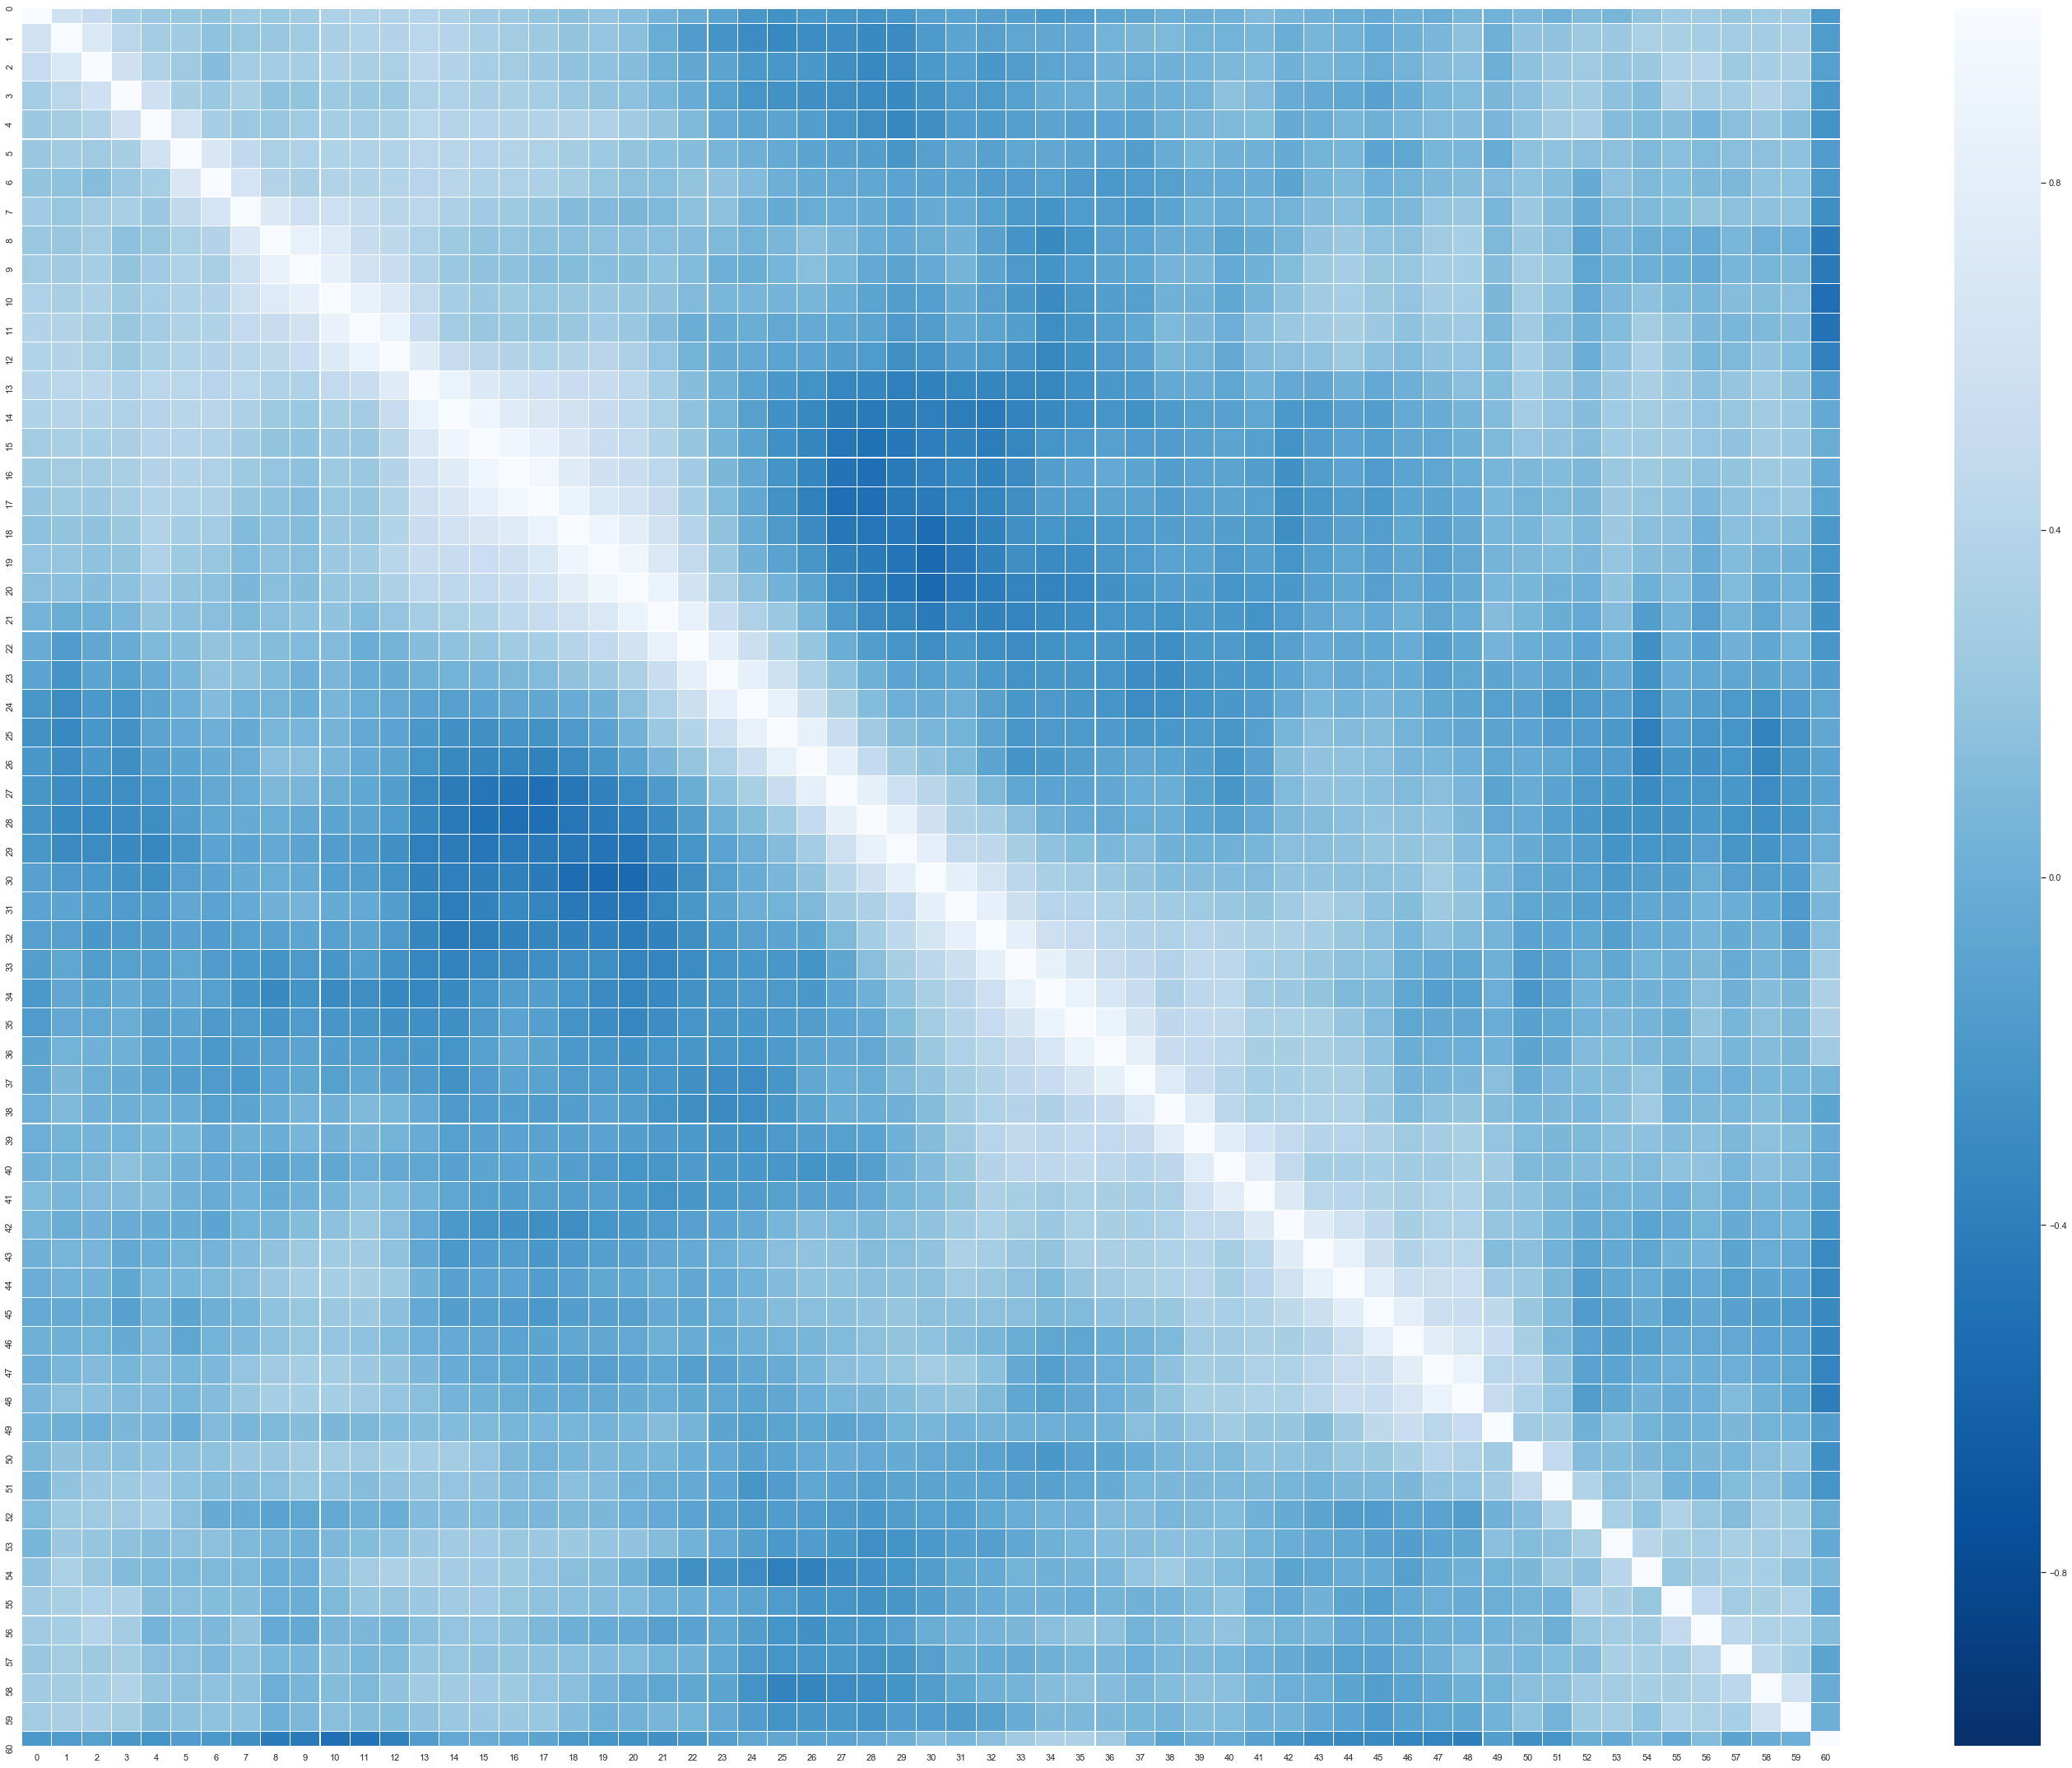

In [40]:
plt.figure(figsize=(39,30))
sns.heatmap(rnmc,vmax=1,vmin=-1,cbar=True,linewidths=0.1,linecolor='white',cmap='Blues_r')
plt.tight_layout()
plt.show()

In [41]:
x=rnm.iloc[:,0:60]
y=rnm.iloc[:,-1]

In [42]:
print('the shape of x: ', x.shape, '\t\t the shape of y: ', y.shape)

the shape of x:  (167, 60) 		 the shape of y:  (167,)


In [43]:
x

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.044304,0.050978,0.080935,0.066630,0.111810,0.229762,0.2156,0.298696,0.287957,0.252469,...,0.012423,0.008365,0.008861,0.004789,0.009356,0.018920,0.013903,0.004888,0.005187,0.004390
3,0.073436,0.064476,0.046979,0.038644,0.057325,0.062881,0.1209,0.220500,0.304834,0.368732,...,0.015480,0.003095,0.005385,0.010445,0.010940,0.001499,0.007174,0.004789,0.010643,0.009356
5,0.031208,0.091302,0.124074,0.131730,0.154779,0.157858,0.0731,0.131116,0.189214,0.301067,...,0.019312,0.019901,0.024497,0.013015,0.006976,0.013706,0.009158,0.014199,0.003594,0.010247
6,0.050598,0.053351,0.080842,0.031402,0.109572,0.088194,0.1027,0.059495,0.136714,0.249824,...,0.005187,0.008067,0.011929,0.004490,0.012027,0.009653,0.008464,0.004689,0.004789,0.005286
7,0.022055,0.036814,0.047265,0.046406,0.062693,0.057419,0.0753,0.009752,0.066162,0.138631,...,0.006081,0.014396,0.012719,0.014396,0.005783,0.004888,0.006479,0.009257,0.005883,0.002198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.018527,0.034015,0.016660,0.017545,0.038547,0.151003,0.2028,0.156491,0.209288,0.237756,...,0.020097,0.011533,0.009752,0.019705,0.003295,0.010049,0.006479,0.011434,0.019116,0.015578
203,0.031789,0.010049,0.029365,0.054867,0.073250,0.091485,0.0990,0.096945,0.098034,0.195073,...,0.005087,0.006081,0.009257,0.013410,0.006280,0.006280,0.003394,0.003195,0.006181,0.006678
204,0.050883,0.042772,0.017840,0.028782,0.034498,0.110736,0.1257,0.111362,0.118494,0.225461,...,0.015381,0.015873,0.002896,0.005087,0.006181,0.008861,0.013903,0.013706,0.007671,0.003095
205,0.029850,0.034691,0.047837,0.059023,0.016562,0.126985,0.1465,0.106430,0.177728,0.211395,...,0.004191,0.008563,0.004589,0.012521,0.003594,0.003494,0.003394,0.007869,0.003594,0.004789


In [44]:
y

0      1
3      1
5      1
6      1
7      1
      ..
202    0
203    0
204    0
205    0
206    0
Name: 60, Length: 167, dtype: int32

In [45]:
x=np.array(x)
y=np.array(y)

In [46]:
x

array([[0.04430393, 0.05097824, 0.08093462, ..., 0.00488803, 0.00518653,
        0.00439035],
       [0.07343632, 0.06447602, 0.046979  , ..., 0.00478852, 0.01064316,
        0.00935609],
       [0.03120793, 0.09130216, 0.12407432, ..., 0.01419872, 0.00359354,
        0.01024732],
       ...,
       [0.05088321, 0.04277209, 0.01783992, ..., 0.01370565, 0.00767051,
        0.0030952 ],
       [0.02985002, 0.03469124, 0.04783733, ..., 0.00786896, 0.00359354,
        0.00478852],
       [0.02566775, 0.03565668, 0.01350835, ..., 0.00359354, 0.00608147,
        0.01143438]])

In [47]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [48]:
print('the shape of x: ', x.shape, '\t\t the shape of y: ', y.shape)

the shape of x:  (167, 60) 		 the shape of y:  (167,)


In [49]:
y=y.reshape(-1,1)

In [50]:
print('the shape of x: ', x.shape, '\t\t the shape of y: ', y.shape)

the shape of x:  (167, 60) 		 the shape of y:  (167, 1)


In [51]:
#ml
#here we can apply logistic regression and classification models like knc,dtc,svc,gnb

In [52]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,cross_val_score as cvs,GridSearchCV as gsv

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

In [53]:
#func for best random_state
def rstate(mod,x,y):
    max_acr=0
    for rns_st in range(25,120):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.40,random_state=rns_st)
        mod.fit(x_train,y_train)
        pred=mod.predict(x_test)
        acr=accuracy_score(pred,y_test)
        f1=f1_score(y_test,pred)
        conf=confusion_matrix(y_test,pred)
        clf=classification_report(y_test,pred)
        if acr>max_acr:
            max_acr=acr
            final_rst=rns_st
    print('the best suited random_state for this model is= ', final_rst, '\n with an accuracy score of ', max_acr ,'\n the f1 score is:', f1,'\n confusion matrix:\n', conf,'\n the classifaction report: \n',clf)
    return final_rst

In [54]:
#LOGISTICREGRESSION()
lgrm=LogisticRegression()
model1=rstate(lgrm,x,y)


the best suited random_state for this model is=  118 
 with an accuracy score of  0.835820895522388 
 the f1 score is: 0.7575757575757577 
 confusion matrix:
 [[26 11]
 [ 5 25]] 
 the classifaction report: 
               precision    recall  f1-score   support

           0       0.84      0.70      0.76        37
           1       0.69      0.83      0.76        30

    accuracy                           0.76        67
   macro avg       0.77      0.77      0.76        67
weighted avg       0.77      0.76      0.76        67



In [55]:
#fitting check
scr1=cvs(lgrm,x,y,cv=15,scoring='accuracy')
print('the accuracy score by LogisticRegression Model with cross_val is:-\t', scr1.mean())

the accuracy score by LogisticRegression Model with cross_val is:-	 0.7061616161616162


In [56]:
dtc=DecisionTreeClassifier()
dtc_para={'criterion':['gini','entropy'],'max_depth':range(2,12),'splitter':['best','random']}
dtc_gsv=gsv(dtc,dtc_para,cv=15)
dtc_gsv.fit(x,y)
dtc_gsv.best_params_

{'criterion': 'gini', 'max_depth': 11, 'splitter': 'random'}

In [57]:
#DECISIONTREECLASSIFIER
dtc=DecisionTreeClassifier(criterion='gini',max_depth=9,splitter='random')
model2=rstate(dtc,x,y)

the best suited random_state for this model is=  36 
 with an accuracy score of  0.8955223880597015 
 the f1 score is: 0.6349206349206349 
 confusion matrix:
 [[24 13]
 [10 20]] 
 the classifaction report: 
               precision    recall  f1-score   support

           0       0.71      0.65      0.68        37
           1       0.61      0.67      0.63        30

    accuracy                           0.66        67
   macro avg       0.66      0.66      0.66        67
weighted avg       0.66      0.66      0.66        67



In [58]:
#fitting check
scr2=cvs(dtc,x,y,cv=15,scoring='accuracy')
print('the accuracy score by DecisionTree Model with cross_val is:-\t', scr2.mean())

the accuracy score by DecisionTree Model with cross_val is:-	 0.6623232323232322


In [59]:
#SUPPORTVECTORCLASSIFIER
svc=SVC()
svc_para={'kernel':['poly','rbf','linear'],'degree':range(3,8),'gamma':[0.001,0.01,0.1,1.0,10]}
svc_gs=gsv(svc,svc_para,cv=15)
svc_gs.fit(x,y)
svc_gs.best_params_

{'degree': 3, 'gamma': 1.0, 'kernel': 'poly'}

In [60]:
svc=SVC(kernel='poly',gamma=1.0,degree=3)
model3=rstate(svc,x,y)

the best suited random_state for this model is=  97 
 with an accuracy score of  0.9253731343283582 
 the f1 score is: 0.8421052631578948 
 confusion matrix:
 [[34  3]
 [ 6 24]] 
 the classifaction report: 
               precision    recall  f1-score   support

           0       0.85      0.92      0.88        37
           1       0.89      0.80      0.84        30

    accuracy                           0.87        67
   macro avg       0.87      0.86      0.86        67
weighted avg       0.87      0.87      0.86        67



In [61]:
#fitting check
scr3=cvs(svc,x,y,cv=15,scoring='accuracy')
print('the accuracy score at SVC with cross_val is= ', scr3.mean())

the accuracy score at SVC with cross_val is=  0.7672727272727273


In [63]:
#KNEIGHBOURSCLASSIFIER
#deafult laef_size=30 and n_neighbors=5
#algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’},
knc=KNeighborsClassifier()
knc_para={'n_neighbors':range(5,45),'leaf_size':range(10,50),'algorithm':['ball_tree','brute','kd_tree']}
knc_gs=gsv(knc,knc_para,cv=15)
knc_gs.fit(x,y)
knc_gs.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 10, 'n_neighbors': 40}

In [64]:
knc=KNeighborsClassifier(n_neighbors=40,leaf_size=10,algorithm='ball_tree')
model4=rstate(knc,x,y)

the best suited random_state for this model is=  69 
 with an accuracy score of  0.746268656716418 
 the f1 score is: 0.6 
 confusion matrix:
 [[25 12]
 [12 18]] 
 the classifaction report: 
               precision    recall  f1-score   support

           0       0.68      0.68      0.68        37
           1       0.60      0.60      0.60        30

    accuracy                           0.64        67
   macro avg       0.64      0.64      0.64        67
weighted avg       0.64      0.64      0.64        67



In [65]:
#fitting check
scr4=cvs(knc,x,y,cv=10,scoring='accuracy')
print('the accuracy score at KNC with cross_val is: ', scr4.mean())

the accuracy score at KNC with cross_val is:  0.6420343137254901


In [66]:
#gaussianNB
gnb=GaussianNB()
model5=rstate(gnb,x,y)

the best suited random_state for this model is=  85 
 with an accuracy score of  0.8656716417910447 
 the f1 score is: 0.7536231884057971 
 confusion matrix:
 [[24 13]
 [ 4 26]] 
 the classifaction report: 
               precision    recall  f1-score   support

           0       0.86      0.65      0.74        37
           1       0.67      0.87      0.75        30

    accuracy                           0.75        67
   macro avg       0.76      0.76      0.75        67
weighted avg       0.77      0.75      0.75        67



In [67]:
scr5=cvs(gnb,x,y,cv=10,scoring='accuracy')

In [68]:
print('the accuracy at gnb with cross_val is: ', scr5.mean())

the accuracy at gnb with cross_val is:  0.6952614379084967


In [69]:
#boosting
from sklearn.ensemble import GradientBoostingClassifier

In [70]:
gbc=GradientBoostingClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=85)

para= {"learning_rate": [0.0001,0.025,0.1,1.0],"max_depth":range(5,9),
       "n_estimators":[250,500,750,1000]}

gbgs= gsv(gbc,para, cv=15)
gbgs.fit(x_train,y_train)
print("best parameters:", gbgs.best_params_)
print("\n best score:",gbgs.best_score_)


best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 1000}

 best score: 0.8108108108108109


In [71]:
gbc=GradientBoostingClassifier(learning_rate=0.025,max_depth=5,n_estimators=500)
gbc.fit(x,y)
pred=gbc.predict(x_test)
acr=accuracy_score(pred,y_test)
conf_matrix=confusion_matrix(y_test,pred)
f1=f1_score(y_test,pred)
clr=classification_report(y_test,pred)
print('accuracy score:-', acr,'\n conf matrix:\n',conf_matrix,'\n f1 score:', f1,'cl report \n', clr)

accuracy score:- 1.0 
 conf matrix:
 [[26  0]
 [ 0 30]] 
 f1 score: 1.0 cl report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        30

    accuracy                           1.00        56
   macro avg       1.00      1.00      1.00        56
weighted avg       1.00      1.00      1.00        56



In [74]:
scr6=cvs(gbc,x,y,cv=5,scoring='accuracy')
print('the accuracy at gbc with cross_val is: ', scr6.mean())

the accuracy at gbc with cross_val is:  0.6233734402852049


In [79]:
from sklearn.ensemble import AdaBoostClassifier
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=100)
abc=AdaBoostClassifier(learning_rate=0.001,n_estimators=100,base_estimator=svc,algorithm='SAMME')
abc.fit(x_train,y_train)
print(abc.score(x_test,y_test))

0.8214285714285714


In [ ]:
#model finalization

In [ ]:
#basing on the accuracy scores svc have the highest

In [80]:
svc=SVC(kernel='poly',gamma=1.0,degree=3)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.40,random_state=100)
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
acr=accuracy_score(pred,y_test)
f1=f1_score(y_test,pred)
confm=confusion_matrix(y_test,pred)
clr=classification_report(y_test,pred)
print('the accuracy score is: ',acr )
print('confusion matrx: \n', confm)
print('classification repo: \n', clr)

the accuracy score is:  0.8507462686567164
confusion matrx: 
 [[31  3]
 [ 7 26]]
classification repo: 
               precision    recall  f1-score   support

           0       0.82      0.91      0.86        34
           1       0.90      0.79      0.84        33

    accuracy                           0.85        67
   macro avg       0.86      0.85      0.85        67
weighted avg       0.86      0.85      0.85        67



In [81]:
#roc_curve
from sklearn.metrics import roc_curve,roc_auc_score,auc

In [82]:
fpr,tpr,thresholds=roc_curve(y_test,pred)

In [83]:
fpr

array([0.        , 0.08823529, 1.        ])

In [84]:
tpr

array([0.        , 0.78787879, 1.        ])

In [85]:
thresholds

array([2, 1, 0])

In [86]:
scoring=roc_auc_score(y_test,pred)

In [87]:
roc_auc=auc(fpr,tpr)
roc_auc

0.8498217468805704

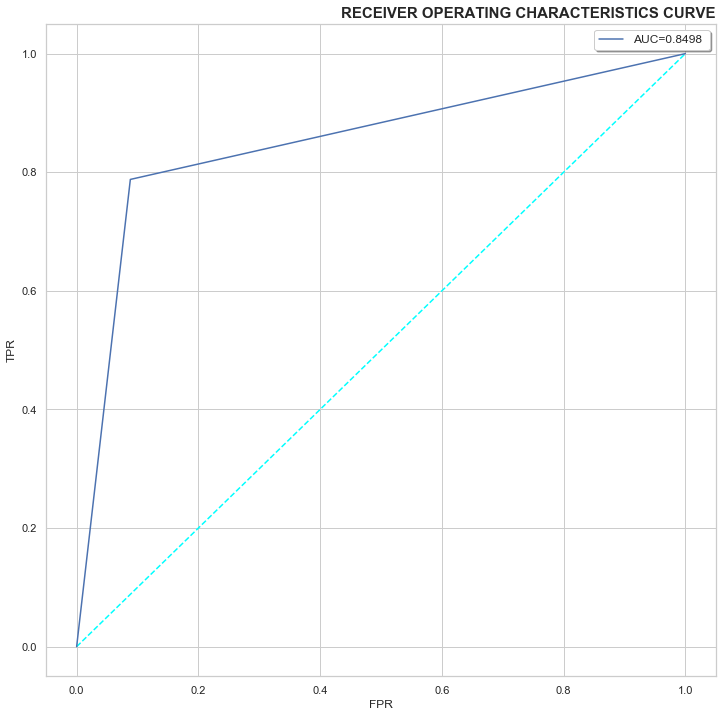

In [90]:
plt.figure(figsize=(12,12))
plt.plot([0,1],[0,1],color='cyan',linestyle="--")
plt.plot(fpr,tpr,label="AUC=%.4f " % roc_auc)
plt.legend(loc='best',fontsize='medium',shadow=True)
plt.xlabel("FPR")
plt.ylabel('TPR')
plt.title('RECEIVER OPERATING CHARACTERISTICS CURVE',size=15,weight='bold',loc='right')
plt.show()

In [91]:
import joblib

In [92]:
joblib.dump(svc,'sonar_svc.pkl')

['sonar_svc.pkl']